In [2]:
NAVER_SERIES_DETAIL_URL = "https://series.naver.com/novel/detail.series?productNo=9498205"

In [3]:
import requests
from fake_useragent import UserAgent
from bs4 import BeautifulSoup as BS
import re
import pandas as pd
import threading
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [4]:
def get_chrome_driver():
    # 1. 브라우저 옵션 세팅
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('headless') #headless모드 브라우저가 뜨지 않고 실행됩니다.
    # chrome_options.add_argument('--window-size= x, y') #실행되는 브라우저 크기를 지정할 수 있습니다.
    # chrome_options.add_argument('--start-maximized') #브라우저가 최대화된 상태로 실행됩니다.
    # chrome_options.add_argument('--start-fullscreen') #브라우저가 풀스크린 모드(F11)로 실행됩니다.
    # chrome_options.add_argument('--blink-settings=imagesEnabled=false') #브라우저에서 이미지 로딩을 하지 않습니다.
    # chrome_options.add_argument('--mute-audio') #브라우저에 음소거 옵션을 적용합니다.
    # chrome_options.add_argument('incognito') #시크릿 모드의 브라우저가 실행됩니다.
    
    # 2. driver 생성
    driver = webdriver.Chrome(
        service = Service(ChromeDriverManager().install()),
        options = chrome_options
    )
    return driver

In [5]:
driver = get_chrome_driver()
driver.get(NAVER_SERIES_DETAIL_URL)
page = driver.page_source

<html lang="ko"><div style="display: none;"><input name="jindo1682912206373" type="input"/></div><head>
<meta charset="utf-8"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="No-Cache" http-equiv="Cache-Control"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>네이버 시리즈</title>
<link href="https://ssl.pstatic.net/static/nstore/series_favicon_152.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://ssl.pstatic.net/static/nstore/series_favicon_114.png" rel="apple-touch-icon-precomposed"/>
<link href="https://ssl.pstatic.net/static/nstore/series_favicon_114.png" rel="apple-touch-icon-precomposed" sizes="114X114"/>
<link href="https://ssl.pstatic.net/static/nstore/series_favicon_120.png" rel="apple-touch-icon-precomposed" sizes="120X120"/>
<link href="https://ssl.pstatic.net/static/nstore/series_favicon_144.png" rel="apple-touch-icon-precomposed" sizes="144X144"/>
<link href="https://ssl.pstatic.net/static/
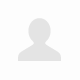
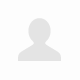

In [6]:
from bs4 import BeautifulSoup as BS
soup = BS(page, "html.parser")
soup

In [31]:
try:
    title = soup.select_one("#content > div.end_head > h2").text.replace("\n"," ").strip()
except:
    title = None
try:
    star_score = float(soup.select_one("#content > div.end_head > div.score_area > em").text.replace("\n"," ").replace(" ", ""))
except:
    star_score = None
try:
    liked = int(soup.select_one("#content > div.end_head > div.user_action_area > ul > li:nth-child(2) > div > a > em").text.replace("\n"," ").replace(" ", ""))
except:
    liked = None
try:
    author = soup.select_one("#content > ul.end_info.NE\=a\:nvi > li > ul > li:nth-child(3) > a").text.replace("\n"," ").strip()
except:
    author = None
try:
    publisher = soup.select_one("#content > ul.end_info.NE\=a\:nvi > li > ul > li:nth-child(4) > a").text.replace("\n"," ").strip()
except:
    publisher = None
try:
    age_rating = soup.select_one("#content > ul.end_info.NE\=a\:nvi > li > ul > li:nth-child(5)").text.replace("\n"," ").strip()
except:
    age_rating = None
try:
    rule = re.compile("[0-9]+_[0_9]")
    sObjectId = re.findall(rule, str(soup)[str(soup).find("sObjectId"):str(soup).find("sObjectId")+22])[0]
except:
    sObjectId = None
title, star_score, liked, author, publisher, age_rating, sObjectId


('아프간에서 각성하다', 8.0, 9, '유나파파', '알에스미디어', '전체 이용가', '500388_0')

'a   b'